Joseph Lannan, HW3, PY525


# Problem 3.1: Renormalziaiton group equations for different values of the parameter

**Read** Section 3.3.2 and 3.3.3 of the notes; Module 3.  Below are the plots discussed in 3.3.2 for $f_k(x)$. Please **review** the code below. 


# RG equation, evolution operator 
$f_{k+1} (x)  = \alpha_k f_k \left( f_k \left(\frac{x}{\alpha_k} \right)\right)\,,\quad 
    \alpha_k = \frac{1}{f_k(f_k(0))}$ with $f_0(x) = 1 - \lambda x^2$





In [ ]:
import matplotlib.pyplot as plt
import sys 
%config InlineBackend.figure_format = 'svg'
import numpy as np
import math

def f(k,x,lamb):
    if(k>0):
        alpha = 1/f(k-1,f(k-1,0,lamb),lamb)
        result=alpha*f(k-1,f(k-1,x/alpha,lamb),lamb)
    else: 
        result = 1 - lamb*x*x
    return result; 

def data(k,lamb):
    xa = np.arange(-1,1,0.01)
    return (xa, np.array([f(k,x,lamb) for x in xa]))

Text(0, 0.5, '$f_k(x)$')

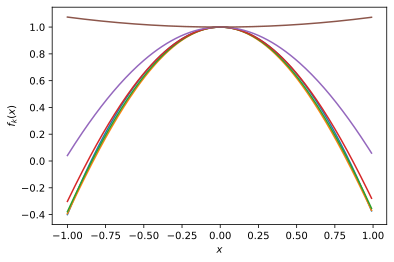

In [ ]:
for k in [0,1,2,3,4,5]:
    (x,y) = data(k,1.40115518909205060052382-0.001) 
    plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$f_k(x)$')

Text(0, 0.5, '$f_k(x)$')

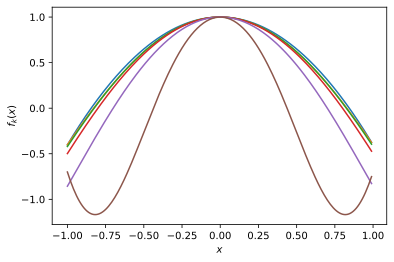

In [ ]:
for k in [0,1,2,3,4,5]:
    (x,y) = data(k,1.40115518909205060052382+0.001) 
    plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$f_k(x)$')

Text(0, 0.5, '$f_k(x)$')

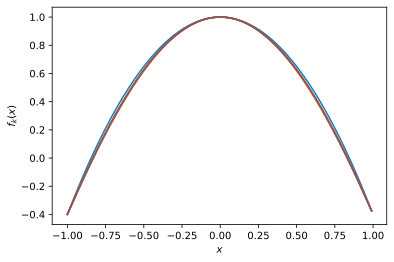

In [ ]:
for k in [0,1,2,3,4,5]:
    (x,y) = data(k,1.40115518909205060052382) 
    plt.plot(x,y)
# fixed point solution: g(x)!!!
plt.xlabel('$x$')
plt.ylabel('$f_k(x)$')

# RG equation has a fixed point:
$$g(x) = \alpha g(g(x/\alpha)), \alpha = 1/g(1)$$

Look for the solution performing the Taylor expansion 
$$g(x) = 1 + \sum_{i=1}^m g_i x^{2i} $$

Find $g_i$ and $\alpha$.  

# Problem 3.2: 
For m=1, that is for the leading order approximation $g(x) = 1 + g_1 x^2$, find $g_1$ and $\alpha$ **analytically**.  

Subsituding in: \\
$1+g_1^2x^2 = \alpha (1+g_1(1+g_1(\frac{x}{\alpha})^2)^2)$ \\
pulling out the coefficient of $x^2$ \\
$g_1 = 2g_1^3 +2g_1^2$ \\
this gives solutions $g_1 = 0, \frac{-1}{2} \pm \frac{\sqrt{3}}{2} $ \\
and \\
$\alpha = 1, -1 + \sqrt{3}, -\sqrt{3} - 1$ \\
This is also done in the bottom cell. \\

and we pick the one that makes sense: \\
$\alpha = -\sqrt{3} - 1$  \\



# Problem 3.3: 
Now We want to increase precision. Here I provide the code to perform this calculations in python for $m=3$.  

In [ ]:
#This takes about 1min to run.

from sympy import *
from numpy import array  
from scipy.optimize import root # to find roots of a nonlinear system of equations   

x, a, g1, g2, g3, g4, g5, g6, g7, g8, g9 = symbols("x, a, g1, g2, g3, g4, g5, g6, g7, g8, g9")
def g(x): 
  return 1 + g1*x**2 + g2*x**4 + g3*x**6 + g4*x**8 + g5*x**10 + g6*x**12 + g7*x**14 #+g8*x**16 +g9*x**18
def gless(x):
  return 1 + g1*x**2 + g2*x**4 + g3*x**6 + g4*x**8 # we dont need as many terms in the g(g(x)) so we can use fewer here

expr = gless(gless(x/a)) - g(x)/a  # this is the equation we want to solve 

print("expr: ", expr)
Polynomial = Poly(expr.expand(), x) # convert to the polynomial form 
Coeffs = Polynomial.coeffs() # extract the coefficient of the polynomial 
print("Coeffs: " , Coeffs)

def solver(x):
    out = []
    for all in [Coeffs[-1],Coeffs[-2],Coeffs[-3],Coeffs[-4],Coeffs[-5],Coeffs[-6],Coeffs[-7],Coeffs[-8]]:
      out.append(float(all.subs({ a: x[0], g1: x[1], g2: x[2], g3: x[3], g4: x[4], g5 : x[5], g6 : x[6], g7 : x[7]})))
    return array(out)

sol = root(solver, [-2.50290755e+00, -1.52763260e+00,  1.04814026e-01,  2.67069481e-02, -3.52836051e-03,  8.20711091e-05,  2.50796413e-05, -2.49419778e-06], method='hybr', jac = False)
print (sol)
print("*****************")
print("alpha is ", sol.x[0])

expr:  g1*(1 + g1*x**2/a**2 + g2*x**4/a**4 + g3*x**6/a**6 + g4*x**8/a**8)**2 + g2*(1 + g1*x**2/a**2 + g2*x**4/a**4 + g3*x**6/a**6 + g4*x**8/a**8)**4 + g3*(1 + g1*x**2/a**2 + g2*x**4/a**4 + g3*x**6/a**6 + g4*x**8/a**8)**6 + g4*(1 + g1*x**2/a**2 + g2*x**4/a**4 + g3*x**6/a**6 + g4*x**8/a**8)**8 + g5*(1 + g1*x**2/a**2 + g2*x**4/a**4 + g3*x**6/a**6 + g4*x**8/a**8)**10 + g6*(1 + g1*x**2/a**2 + g2*x**4/a**4 + g3*x**6/a**6 + g4*x**8/a**8)**12 + g7*(1 + g1*x**2/a**2 + g2*x**4/a**4 + g3*x**6/a**6 + g4*x**8/a**8)**14 + 1 - (g1*x**2 + g2*x**4 + g3*x**6 + g4*x**8 + g5*x**10 + g6*x**12 + g7*x**14 + 1)/a
Coeffs:  [g4**14*g7/a**112, 14*g3*g4**13*g7/a**110, (14*g2*g4**13*g7 + 91*g3**2*g4**12*g7)/a**108, (14*g1*g4**13*g7 + 182*g2*g3*g4**12*g7 + 364*g3**3*g4**11*g7)/a**106, (182*g1*g3*g4**12*g7 + 91*g2**2*g4**12*g7 + 1092*g2*g3**2*g4**11*g7 + 1001*g3**4*g4**10*g7 + 14*g4**13*g7)/a**104, (182*g1*g2*g4**12*g7 + 1092*g1*g3**2*g4**11*g7 + 1092*g2**2*g3*g4**11*g7 + 4004*g2*g3**3*g4**10*g7 + 2002*g3**5*g4**9*g

In [ ]:
#Going for 9 coefficients, this takes substantially longer to run

from sympy import *
from numpy import array  
from scipy.optimize import root # to find roots of a nonlinear system of equations   

x, a, g1, g2, g3, g4, g5, g6, g7, g8, g9 = symbols("x, a, g1, g2, g3, g4, g5, g6, g7, g8, g9")
def g(x): 
  return 1 + g1*x**2 + g2*x**4 + g3*x**6 + g4*x**8 + g5*x**10 + g6*x**12 + g7*x**14 +g8*x**16 +g9*x**18
def gless(x):
  return 1 + g1*x**2 + g2*x**4 + g3*x**6 + g4*x**8 + g5*x**10 # we dont need as many terms in the g(g(x)) so we can use fewer here

expr = g(gless(x/a)) - g(x)/a  # this is the equation we want to solve 

print("expr: ", expr)
Polynomial = Poly(expr.expand(), x) # convert to the polynomial form 
Coeffs = Polynomial.coeffs() # extract the coefficient of the polynomial 
print("Coeffs: " , Coeffs)

def solver(x):
    out = []
    for all in [Coeffs[-1],Coeffs[-2],Coeffs[-3],Coeffs[-4],Coeffs[-5],Coeffs[-6],Coeffs[-7],Coeffs[-8],Coeffs[-9],Coeffs[-10]]:
      out.append(float(all.subs({ a: x[0], g1: x[1], g2: x[2], g3: x[3], g4: x[4], g5 : x[5], g6 : x[6], g7 : x[7], g8 : x[8], g9: x[9]})))
    return array(out)

sol = root(solver, [-2.50290755e+00, -1.52763260e+00,  1.04814026e-01,  2.67069481e-02, -3.52836051e-03,  8.20711091e-05,  2.50796413e-05, -2.49419778e-06, 0, 0], method='hybr', jac = False)
print (sol)
print("*****************")
print("alpha is ", sol.x[0])

Output hidden; open in https://colab.research.google.com to view.

This is still rather rough estimate of $\alpha$. One needs to go to higher order to get a better estimate. **Consider $m=7$. Find $\alpha$.** \\
Theres still multiple results were not looking at, and we only have some of the equations. \\
actual is $ \alpha = 2.50290787509589282228390287321$

In [ ]:
#this is where i wasted a bunch of time trying to do it analytically for higher orders. It seems to fail for anything but m=1 because the equation gets over constrained
from sympy import *
from numpy import array  
from scipy.optimize import root
from sympy.solvers.solveset import nonlinsolve

#generating the equation and a list of the variables:
def gm(x,m,a):
  d = [a]
  eqn = 1
  for i in range(1,m+1):
    d.append("g"+str(i))
    d[-1] = symbols("g"+str(i))
    eqn += x**(2*i)*d[-1]
  return [eqn,d] #returns the equation up to order m in [0] as well as a list of all the variables in [1], incase we need that later


m=1

x, a = symbols("x a")
eqn = gm(x,m,a)
g = eqn[0]
print("g: ",g)
print("vars: ",eqn[1])
expr = simplify(g.subs(x,g.subs(x,x/a)) - g/a)  # this is the equation we want to solve 
print("expr: ", expr)
Polynomial = Poly(expr.expand(), x) # convert to the polynomial form 
print("Polynomial: ", Polynomial)
Coeffs = Polynomial.coeffs()[1:] #just picking out some of the equations to solve here, if we leave in equation 0 then the result is over constrained and gives (0,1). This seems pretty weird but whatever.
print("Coeffs: ", Coeffs)
print("_____________")
print()

result = simplify(nonlinsolve(Coeffs, eqn[1]))
print("solve result: ",result,"\nvariables: ",eqn[1],'\n')
print("Evaluated results:")
for i in result:
  print("\n result of ", i)
  for n in i:
    print(N(n))


g:  g1*x**2 + 1
vars:  [a, g1]
expr:  1 - g1*x**2/a - 1/a + g1*(a**2 + g1*x**2)**2/a**4
Polynomial:  Poly(g1**3/a**4*x**4 + (-a*g1 + 2*g1**2)/a**2*x**2 + (a*g1 + a - 1)/a, x, domain='ZZ(a,g1)')
Coeffs:  [(-a*g1 + 2*g1**2)/a**2, (a*g1 + a - 1)/a]
_____________

solve result:  {(1, 0), (-1 + sqrt(3), -1/2 + sqrt(3)/2), (-sqrt(3) - 1, -sqrt(3)/2 - 1/2)} 
variables:  [a, g1] 

Evaluated results:

 result of  (1, 0)
1.00000000000000
0

 result of  (-1 + sqrt(3), -1/2 + sqrt(3)/2)
0.732050807568877
0.366025403784439

 result of  (-sqrt(3) - 1, -sqrt(3)/2 - 1/2)
-2.73205080756888
-1.36602540378444
